In [1]:
library(boot)
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
set.seed(2019)

In [3]:
#TRAIN 1: ALL COVARIATES PLUS INTERACTION TERMS
train1 <- read.csv("trainC.csv")
test1 <- read.csv("testC.csv")
train1 <- subset(train1, select = -c(sessionDate, trialNum, timeSinceKetamine, animalName))
test1 <- subset(test1, select = -c(sessionDate, trialNum, timeSinceKetamine, animalName))

#TRAIN 2: ALL COVARIATES NO INTERACTION TERMS
train2 <- subset(train1, select = c(totalCellNum,gender,genotype,weight_g,ketamine_day,
                                    correlationScore,lickAccuracy,lickNumber,avgFR,
                                    avgSingleCellVariance,varianceFR,avgTrialSpeed,
                                    varianceSpeed,medianCellDepth,ketBool))
test2 <- subset(test1, select = c(totalCellNum,gender,genotype,weight_g,ketamine_day,
                                    correlationScore,lickAccuracy,lickNumber,avgFR,
                                    avgSingleCellVariance,varianceFR,avgTrialSpeed,
                                    varianceSpeed,medianCellDepth,ketBool))

# Model Generation and Test Error Estimation

## Basic Logistic Regression Model with Interaction Terms

In [4]:
k = 10
n = length(train1[,1])
fsize = round(n/k)
rmse = rep(0,k)
zoloss = rep(0,k)
for (i in 1:(k-1)){
    # Get train and validation sets
    df_train <- train1[-(((i-1)*fsize+1):(i*fsize)),]
    df_val <- train1[((i-1)*fsize+1):(i*fsize),]
    # Fit model on training and make predictions on validation
    model_cv <- glm(ketBool ~ ., data=df_train, family='binomial')
    lr_pred_lo <- predict(model_cv,df_val) # lo : log odds
    num_val = length(df_val$ketBool)
    lr_pred = rep(0,num_val)
    actual = rep(0,num_val)
    for (j in 1:num_val){
        if (lr_pred_lo[j]>0){
            lr_pred[j]=1
        }
    actual[j] = df_val$ketBool[j]
    }
    # Compute 0-1 loss for each observation
    lr_loss = abs(lr_pred-actual) # loss is 0 if NB_pred=actual, 1 otherwise
    # Compute mean 0-1 loss on the val set
    zoloss[i] = mean(lr_loss)
}
df_train <- train1[-(((k-1)*fsize+1):n),]
df_val <- train1[((k-1)*fsize+1):n,]
# Fit model on training and make predictions on validation
model_cv <- glm(ketBool ~ ., data=df_train, family='binomial')
lr_pred_lo <- predict(model_cv,df_val) # lo : log odds
num_val = length(df_val$ketBool)
lr_pred = rep(0,num_val)
actual = rep(0,num_val)
for (j in 1:num_val){
    if (lr_pred_lo[j]>0){
        lr_pred[j]=1
    }
    actual[j] = df_val$ketBool[j]
}
lr_loss = abs(lr_pred-actual)
zoloss[k] = mean(lr_loss)
test_error_est = mean(zoloss)

cat("=====================================================================\n")
cat("Logistic Regression Model with Interaction Terms\n\n")
cat("Zero-One Loss (10-fold Cross-Validation Average):",test_error_est,"\n")
cat("Accuracy (10-fold Cross-Validation Average):",1-test_error_est,"\n")
cat("=====================================================================\n")

# Train now on entire training set to get model for prediction
model1 <- glm(ketBool ~ ., data=train1, family='binomial')

Logistic Regression Model with Interaction Terms

Zero-One Loss (10-fold Cross-Validation Average): 0.09182746 
Accuracy (10-fold Cross-Validation Average): 0.9081725 


## Basic Logistic Regression without Interaction Terms

In [5]:
k = 10
n = length(train2[,1])
fsize = round(n/k)
rmse = rep(0,k)
zoloss = rep(0,k)
for (i in 1:(k-1)){
    # Get train and validation sets
    df_train <- train2[-(((i-1)*fsize+1):(i*fsize)),]
    df_val <- train2[((i-1)*fsize+1):(i*fsize),]
    # Fit model on training and make predictions on validation
    model_cv <- glm(ketBool ~ ., data=df_train, family='binomial')
    lr_pred_lo <- predict(model_cv,df_val) # lo : log odds
    num_val = length(df_val$ketBool)
    lr_pred = rep(0,num_val)
    actual = rep(0,num_val)
    for (j in 1:num_val){
        if (lr_pred_lo[j]>0){
            lr_pred[j]=1
        }
    actual[j] = df_val$ketBool[j]
    }
    # Compute 0-1 loss for each observation
    lr_loss = abs(lr_pred-actual) # loss is 0 if NB_pred=actual, 1 otherwise
    # Compute mean 0-1 loss on the val set
    zoloss[i] = mean(lr_loss)
}
df_train <- train2[-(((k-1)*fsize+1):n),]
df_val <- train2[((k-1)*fsize+1):n,]
# Fit model on training and make predictions on validation
model_cv <- glm(ketBool ~ ., data=df_train, family='binomial')
lr_pred_lo <- predict(model_cv,df_val) # lo : log odds
num_val = length(df_val$ketBool)
lr_pred = rep(0,num_val)
actual = rep(0,num_val)
for (j in 1:num_val){
    if (lr_pred_lo[j]>0){
        lr_pred[j]=1
    }
    actual[j] = df_val$ketBool[j]
}
lr_loss = abs(lr_pred-actual)
zoloss[k] = mean(lr_loss)
test_error_est = mean(zoloss)

cat("=====================================================================\n")
cat("Logistic Regression Model without Interaction Terms\n\n")
cat("Zero-One Loss (10-fold Cross-Validation Average):",test_error_est,"\n")
cat("Accuracy (10-fold Cross-Validation Average):",1-test_error_est,"\n")
cat("=====================================================================\n")

# Train now on entire training set to get model for prediction
model2 <- glm(ketBool ~ ., data=train2, family='binomial')

Logistic Regression Model without Interaction Terms

Zero-One Loss (10-fold Cross-Validation Average): 0.1413709 
Accuracy (10-fold Cross-Validation Average): 0.8586291 


# Look at Coefficients on TRAIN

## Model 1 (including interaction terms) Summary

In [6]:
summary(model1)


Call:
glm(formula = ketBool ~ ., family = "binomial", data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9532  -0.2677   0.0100   0.2355   5.0333  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           -3.07543    0.84032  -3.660 0.000252 ***
totalCellNum                           1.48468    0.36237   4.097 4.18e-05 ***
gender                                 5.27077    0.80163   6.575 4.86e-11 ***
genotype                               4.70327    0.73513   6.398 1.58e-10 ***
weight_g                               0.12584    0.35738   0.352 0.724760    
ketamine_day                          -0.71834    0.25786  -2.786 0.005340 ** 
correlationScore                      -2.30386    0.96069  -2.398 0.016479 *  
lickAccuracy                          -2.59838    0.62801  -4.137 3.51e-05 ***
lickNumber                            -0.51051    0.76272  -0.669 0.503289    
avgFR      

## Model 2 (not including interaction terms) Summary

In [7]:
summary(model2)


Call:
glm(formula = ketBool ~ ., family = "binomial", data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1024  -0.4780   0.0845   0.4688   3.8002  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.64251    0.15630  -4.111 3.94e-05 ***
totalCellNum          -0.03728    0.06442  -0.579 0.562759    
gender                 0.46578    0.13882   3.355 0.000793 ***
genotype               0.05546    0.11283   0.492 0.623009    
weight_g              -0.46373    0.06503  -7.131 9.94e-13 ***
ketamine_day           0.16121    0.04486   3.594 0.000326 ***
correlationScore      -1.50123    0.07377 -20.351  < 2e-16 ***
lickAccuracy          -0.80960    0.05888 -13.750  < 2e-16 ***
lickNumber            -0.60947    0.06549  -9.306  < 2e-16 ***
avgFR                  1.77153    0.12885  13.749  < 2e-16 ***
avgSingleCellVariance -1.32595    0.11463 -11.567  < 2e-16 ***
varianceFR            -0.23810    0.05966  -3

# Test Performance

In [8]:
lr_pred_lo <- predict(model1,test1) # lo : log odds
num_val = length(test1$ketBool)
lr_pred = rep(0,num_val)
actual = rep(0,num_val)
for (j in 1:num_val){
    if (lr_pred_lo[j]>0){
        lr_pred[j]=1
    }
    actual[j] = test1$ketBool[j]
}
lr_loss = abs(lr_pred-actual)
zoloss[k] = mean(lr_loss)
test_error_est = mean(zoloss)

cat("=====================================================================\n")
cat("Logistic Regression Model with Interaction Terms\n\n")
cat("Zero-One Loss (Test Set):",test_error_est,"\n")
cat("Accuracy (Test Set):",1-test_error_est,"\n")
cat("=====================================================================\n")

Logistic Regression Model with Interaction Terms

Zero-One Loss (Test Set): 0.13475 
Accuracy (Test Set): 0.86525 


In [9]:
lr_pred_lo <- predict(model2,test2) # lo : log odds
num_val = length(test2$ketBool)
lr_pred = rep(0,num_val)
actual = rep(0,num_val)
for (j in 1:num_val){
    if (lr_pred_lo[j]>0){
        lr_pred[j]=1
    }
    actual[j] = test2$ketBool[j]
}
lr_loss = abs(lr_pred-actual)
zoloss[k] = mean(lr_loss)
test_error_est = mean(zoloss)

cat("=====================================================================\n")
cat("Logistic Regression Model without Interaction Terms\n\n")
cat("Zero-One Loss (Test Set):",test_error_est,"\n")
cat("Accuracy (Test Set):",1-test_error_est,"\n")
cat("=====================================================================\n")

Logistic Regression Model without Interaction Terms

Zero-One Loss (Test Set): 0.14175 
Accuracy (Test Set): 0.85825 


# Look at Coefficients on TEST

## With Interaction Terms

In [92]:
model1_test <- glm(ketBool ~ ., data=test1, family='binomial')
summary(model1_test)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = ketBool ~ ., family = "binomial", data = test1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0289  -0.1986   0.0016   0.1849   2.9694  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           -3.65227    2.05234  -1.780 0.075147 .  
totalCellNum                           0.26300    0.88535   0.297 0.766426    
gender                                 7.81598    1.83003   4.271 1.95e-05 ***
genotype                               7.42112    1.86461   3.980 6.89e-05 ***
weight_g                               1.15238    0.83398   1.382 0.167037    
ketamine_day                          -1.58289    0.63604  -2.489 0.012823 *  
correlationScore                      -2.20880    2.19214  -1.008 0.313647    
lickAccuracy                          -2.24522    1.44600  -1.553 0.120494    
lickNumber                             0.33636    1.85504   0.181 0.856112    
avgFR       

In [129]:
sum <- summary(model1_test)
sumdf<-data.frame(unclass(sum)$coefficients)
names(sumdf)[2] = "std_error"

Warning message in mtext(labs, side = 2, line = loffset, at = y, adj = 0, col = color, :
“"xlabel" is not a graphical parameter”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"xlabel" is not a graphical parameter”

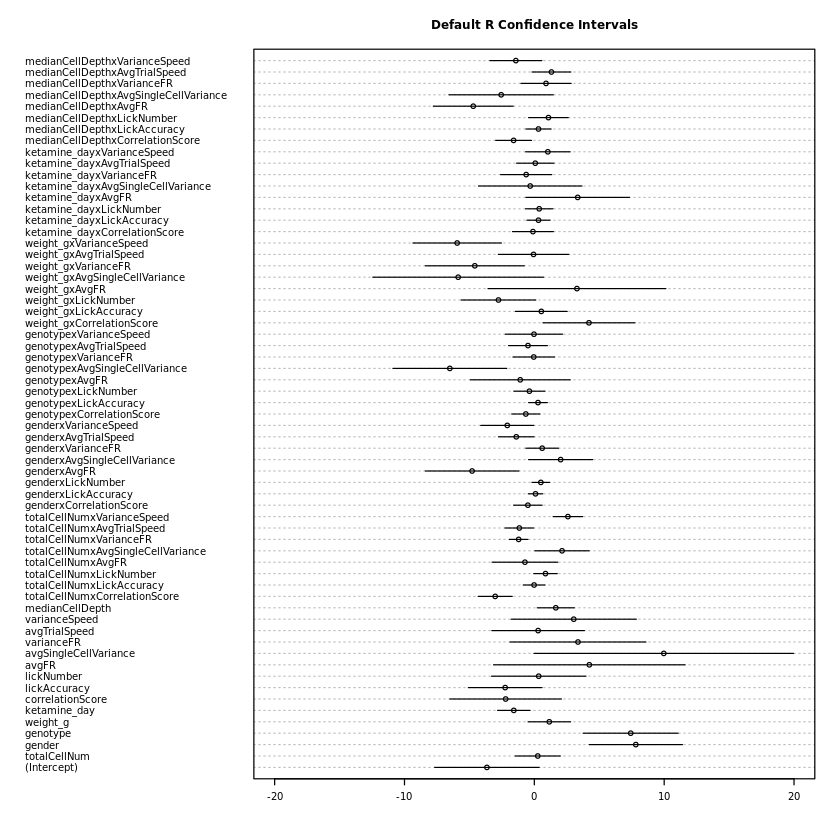

In [144]:
dotchart(sumdf$Estimate,labels = row.names(sumdf), xlim=c(floor(min(sumdf$LowerBoundR)/10)*10, 
                ceiling(max(sumdf$UpperBoundR)/10)*10), cex=0.5, main = "Default R Confidence Intervals", xlabel = "Coefficient Estimate")
for (i in 1:nrow(sumdf)){
    lines(x=c(sumdf$LowerBoundR[i],sumdf$UpperBoundR[i]), y=c(i,i))
}

In [130]:
sumdf["LowerBoundR"] = sumdf$Estimate - 1.96*sumdf$std_error
sumdf["UpperBoundR"] = sumdf$Estimate + 1.96*sumdf$std_error

## Without Interaction Terms

In [11]:
model2_test <- glm(ketBool ~ ., data=test2, family='binomial')
summary(model2_test)


Call:
glm(formula = ketBool ~ ., family = "binomial", data = test2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.52524  -0.51562   0.05817   0.49094   3.03239  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.11054    0.29360  -0.377 0.706540    
totalCellNum          -0.20103    0.12503  -1.608 0.107873    
gender                 0.38001    0.26237   1.448 0.147507    
genotype               0.28291    0.21514   1.315 0.188518    
weight_g              -0.21089    0.13190  -1.599 0.109851    
ketamine_day          -0.07733    0.08284  -0.934 0.350543    
correlationScore      -1.27870    0.13062  -9.789  < 2e-16 ***
lickAccuracy          -0.77094    0.10958  -7.035 1.99e-12 ***
lickNumber            -0.69481    0.14704  -4.725 2.30e-06 ***
avgFR                  1.96396    0.25970   7.562 3.96e-14 ***
avgSingleCellVariance -1.21420    0.22392  -5.423 5.88e-08 ***
varianceFR            -0.54385    0.

# BOOTSTRAP

In [16]:
df = train1
coef.boot = function(data, indices) {
fm = glm(data = data[indices,],ketBool ~ ., family='binomial')
return(coef(fm))
}

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

## 5000 iterations for speed

In [19]:
boot.out5000 = boot(df, coef.boot, 5000)
boot.out5000


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df, statistic = coef.boot, R = 5000)


Bootstrap Statistics :
        original       bias    std. error
t1*  -3.07542785 -0.163512021   0.8860557
t2*   1.48468157  0.112356796   0.3982214
t3*   5.27077347  0.159548420   0.9726796
t4*   4.70326862  0.313296250   0.8355723
t5*   0.12583501  0.117775884   0.4392267
t6*  -0.71834083 -0.039675563   0.2893456
t7*  -2.30385934 -0.161958413   1.0846243
t8*  -2.59837684 -0.142450055   0.8149587
t9*  -0.51050792  0.305620053   1.0697160
t10*  4.72544849  0.406416640   2.0435735
t11*  7.85495894  0.347478652   2.6492854
t12*  1.58919458  0.327730785   1.2905950
t13* -0.91610950  0.046432168   0.7747884
t14*  1.67179140  0.069693668   1.5398312
t15*  1.26773118  0.064050586   0.3727106
t16* -2.45892080 -0.136245023   0.3385636
t17*  0.24686052  0.021494625   0.1872190
t18*  0.08497568 -0.062724044   0.2535600
t19*  1.43740112  0.004117731   0.6191387
t20* -0.67644636 -0.031402824   0.4553493
t2

## 50000 iterations (full)

In [21]:
boot.out50000 = boot(df, coef.boot, 50000)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [157]:
uct <- unclass(boot.out50000)

In [185]:
boot_estimate = rep(0,63) 
for (j in 1:63){
    boot_estimate[j] = mean(uct$t[,j])
}

In [188]:
length(boot_estimate)

[1] 63

In [189]:
df <- boot.ci(boot.out50000, index=1, conf = 0.95, type = "norm")$normal
for (j in 2:63){
    df<-rbind(df,boot.ci(boot.out50000, index=j, conf = 0.95, type = "norm")$normal)
}
df<-data.frame(df)
names(df)[2] = "LowerBoundBoot"
names(df)[3] = "UpperBoundBoot"

Warning message in mtext(labs, side = 2, line = loffset, at = y, adj = 0, col = color, :
“"xlabel" is not a graphical parameter”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"xlabel" is not a graphical parameter”

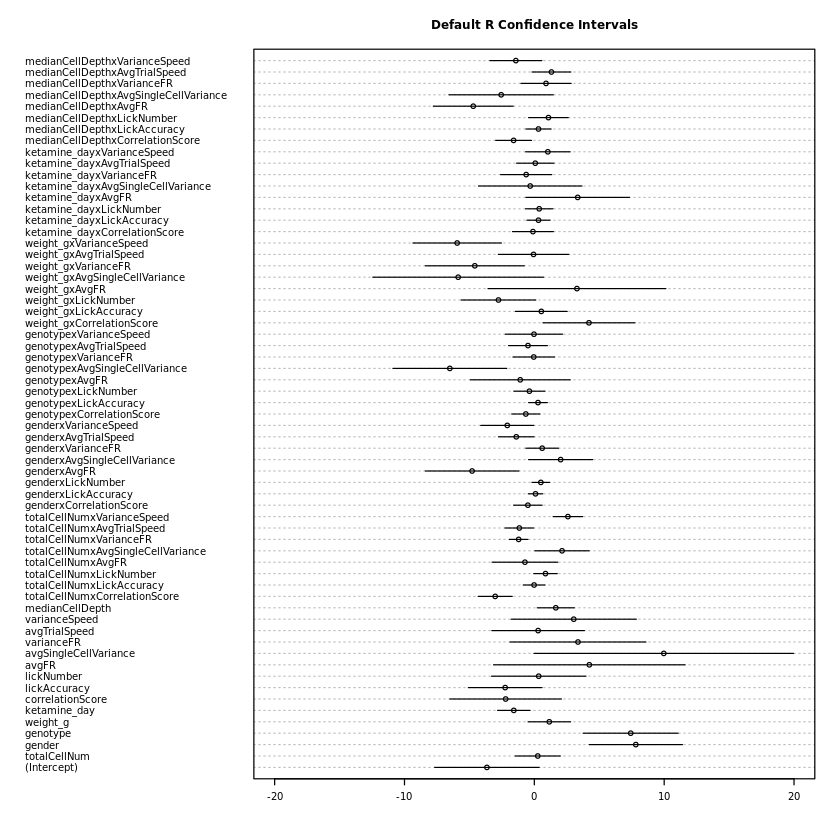

In [153]:
dotchart(sumdf$Estimate,labels = row.names(sumdf), xlim=c(floor(min(sumdf$LowerBoundR)/10)*10, 
                ceiling(max(sumdf$UpperBoundR)/10)*10), cex=0.5, main = "Default R Confidence Intervals", xlabel = "Coefficient Estimate")
for (i in 1:nrow(sumdf)){
    lines(x=c(sumdf$LowerBoundR[i],sumdf$UpperBoundR[i]), y=c(i,i))
}

Warning message in mtext(labs, side = 2, line = loffset, at = y, adj = 0, col = color, :
“"xlabel" is not a graphical parameter”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"xlabel" is not a graphical parameter”

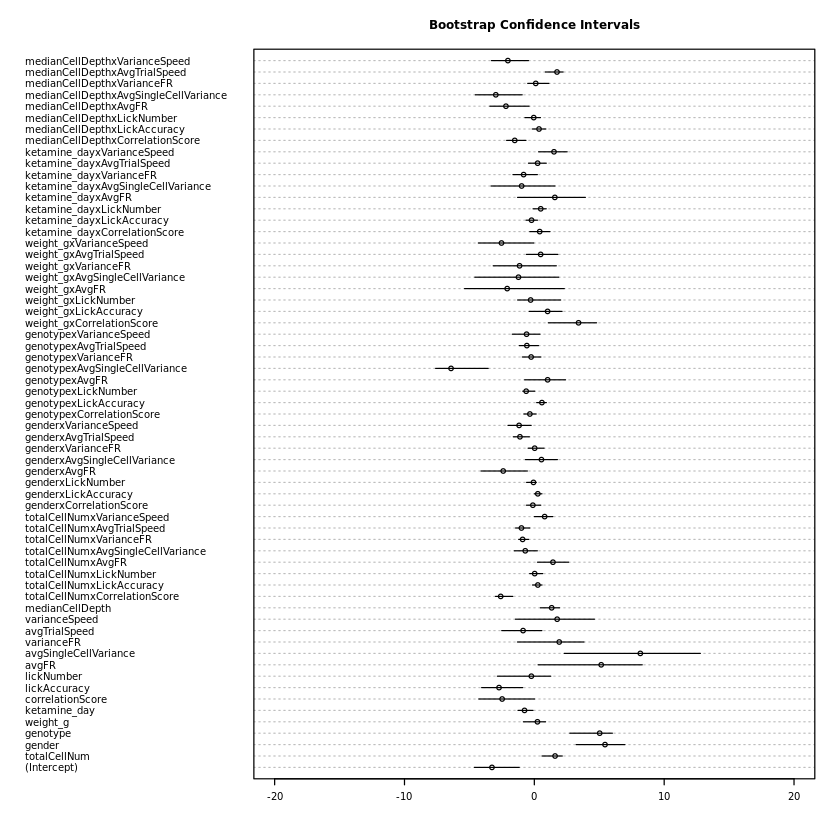

In [190]:
dotchart(boot_estimate,labels = row.names(sumdf), xlim=c(floor(min(sumdf$LowerBoundR)/10)*10, 
                ceiling(max(sumdf$UpperBoundR)/10)*10), cex=0.5, main = "Bootstrap Confidence Intervals", xlabel = "Coefficient Estimate")
for (i in 1:nrow(sumdf)){
    lines(x=c(df$LowerBoundBoot[i],df$UpperBoundBoot[i]), y=c(i,i))
}